## ***Pandas Advance*** - 4

In [2]:
import pandas as pd

In [3]:
df1 = pd.DataFrame({
    "Description" : ["PW Skills is your partner in effective upskilling. Get more value for time and resources you invest, with job-ready courses powered by high-technology, accessible for everyone!"]
})
df1

,Description
0,PW Skills is your partner in effective upskill...


We are not able to see full length of description

In [4]:
pd.set_option('display.max_colwidth', 1000)
df1

,Description
0,"PW Skills is your partner in effective upskilling. Get more value for time and resources you invest, with job-ready courses powered by high-technology, accessible for everyone!"


In [5]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
df1

,Description
0,"PW Skills is your partner in effective upskilling. Get more value for time and resources you invest, with job-ready courses powered by high-technology, accessible for everyone!"


In [6]:
df1["char_len"] = df1['Description'].apply(len)

In [7]:
df1

,Description,char_len
0,"PW Skills is your partner in effective upskilling. Get more value for time and resources you invest, with job-ready courses powered by high-technology, accessible for everyone!",176


In [8]:
s = "Hii, I am Mritunjay"
s = s.split(' ')
len(s)

4

In [9]:
# Finding number of words in description
df1["word_count"] = df1["Description"].apply(lambda x: len(x.split(' ')))

In [10]:
df1

,Description,char_len,word_count
0,"PW Skills is your partner in effective upskilling. Get more value for time and resources you invest, with job-ready courses powered by high-technology, accessible for everyone!",176,26


In [11]:
data = {
    "text":['Hello Data science', "I love ML", "I read love stories"]
}
a = pd.DataFrame(data)
a

,text
0,Hello Data science
1,I love ML
2,I read love stories


In [12]:
a['text_lower'] = a["text"].str.lower()

In [13]:
a

,text,text_lower
0,Hello Data science,hello data science
1,I love ML,i love ml
2,I read love stories,i read love stories


In [14]:
a["text_upper"] = a["text"].str.upper()

In [15]:
a

,text,text_lower,text_upper
0,Hello Data science,hello data science,HELLO DATA SCIENCE
1,I love ML,i love ml,I LOVE ML
2,I read love stories,i read love stories,I READ LOVE STORIES


In [16]:
a['text'][0].startswith('H')

True

In [17]:
df1 = pd.DataFrame({
    'a':[1,2,4,5,6],
    'b':[4,5,6,7,8]
})
df1

,a,b
0,1,4
1,2,5
2,4,6
3,5,7
4,6,8


In [18]:
df1["mul_5"] = df1['a']*5
df1

,a,b,mul_5
0,1,4,5
1,2,5,10
2,4,6,20
3,5,7,25
4,6,8,30


In [19]:
df1['a'].mean()

np.float64(3.6)

In [20]:
df1.a.median()

np.float64(4.0)

In [21]:
df1.a.mode()

0    1
1    2
2    4
3    5
4    6
Name: a, dtype: int64

In [22]:
df1.a.min()

np.int64(1)

In [23]:
df1.a.max()

np.int64(6)

In [24]:
df1.a.sum()

np.int64(18)

In [25]:
df1.a.var()

np.float64(4.3)

In [26]:
df1.a.describe()

count    5.000000
mean     3.600000
std      2.073644
min      1.000000
25%      2.000000
50%      4.000000
75%      5.000000
max      6.000000
Name: a, dtype: float64

In [27]:
df2 = pd.DataFrame({
    'a':[1,2,3,4,5,6,7,8,9]
})
df2

,a
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9


In [28]:
df2.a.mean()

np.float64(5.0)

In pandas, a rolling window is used to perform operations (like mean, sum, etc.) on a sliding window of a specified size across a dataset. You can use the .rolling(window_size).mean()

In [29]:
df2.a.rolling(window=2).mean()

0    NaN
1    1.5
2    2.5
3    3.5
4    4.5
5    5.5
6    6.5
7    7.5
8    8.5
Name: a, dtype: float64

In [30]:
df2.a.rolling(window=3).mean()

0    NaN
1    NaN
2    2.0
3    3.0
4    4.0
5    5.0
6    6.0
7    7.0
8    8.0
Name: a, dtype: float64

In [31]:
df3 = df2[['a']].rolling(window=3).mean()

In [32]:
df3.dropna(inplace=True)

In [33]:
df3

,a
2,2.0
3,3.0
4,4.0
5,5.0
6,6.0
7,7.0
8,8.0


In [34]:
# Typecasting in a row
df3['a_int'] = df3['a'].astype('int')
df3

,a,a_int
2,2.0,2
3,3.0,3
4,4.0,4
5,5.0,5
6,6.0,6
7,7.0,7
8,8.0,8


In [35]:
df2.rolling(window=2).sum()

,a
0,NaN
1,3.0
2,5.0
3,7.0
4,9.0
5,11.0
6,13.0
7,15.0
8,17.0


In [36]:
df2.rolling(window=2).min()

,a
0,NaN
1,1.0
2,2.0
3,3.0
4,4.0
5,5.0
6,6.0
7,7.0
8,8.0


In [37]:
import numpy as np
np.random.choice(['A', 'B'])

np.str_('A')

In [38]:
df2['Group'] = np.random.choice(['A', 'B'], size=9)
df2

,a,Group
0,1,B
1,2,A
2,3,B
3,4,A
4,5,B
5,6,A
6,7,A
7,8,B
8,9,A


groupby('Group'): Groups the DataFrame by the unique values in the 'Group' column.
</br>
```
Groups the DataFrame by 'Group' (A/B).
Sums the values in 'a' for each group.
```

In [39]:
df2.groupby('Group')['a'].sum()

Group
A    28
B    17
Name: a, dtype: int64

In [40]:
#groupby with rolling sum
df2.groupby('Group')['a'].rolling(window=2).sum()

Group   
A      1     NaN
       3     6.0
       5    10.0
       6    13.0
       8    16.0
B      0     NaN
       2     4.0
       4     8.0
       7    13.0
Name: a, dtype: float64

In [41]:
df2.a

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: a, dtype: int64

In [42]:
# Cumulative sum
df2.a.cumsum()

0     1
1     3
2     6
3    10
4    15
5    21
6    28
7    36
8    45
Name: a, dtype: int64

## Date, Time Concept in pandas

Here is an example of Date Time Series
```
            stock_price
date                  
2024-02-01         120
2024-02-02         135
2024-02-03         150
2024-02-04         140
2024-02-05         160
2024-02-06         175
2024-02-07         190
2024-02-08         180
2024-02-09         195
2024-02-10         185
```

In [43]:
df = pd.DataFrame({
    "date":['2024-03-08', '2024-03-09', '2024-03-10']
})
df

,date
0,2024-03-08
1,2024-03-09
2,2024-03-10


In [44]:
df.dtypes

date    object
dtype: object

In [45]:
df['updated_dates'] = pd.to_datetime(df["date"])
df

,date,updated_dates
0,2024-03-08,2024-03-08
1,2024-03-09,2024-03-09
2,2024-03-10,2024-03-10


In [46]:
df.dtypes

date                     object
updated_dates    datetime64[ns]
dtype: object

In [47]:
df['year'] = df.updated_dates.dt.year
df

,date,updated_dates,year
0,2024-03-08,2024-03-08,2024
1,2024-03-09,2024-03-09,2024
2,2024-03-10,2024-03-10,2024


In [48]:
df['month'] = df.updated_dates.dt.month
df

,date,updated_dates,year,month
0,2024-03-08,2024-03-08,2024,3
1,2024-03-09,2024-03-09,2024,3
2,2024-03-10,2024-03-10,2024,3


In [49]:
df['day'] = df.updated_dates.dt.day
df

,date,updated_dates,year,month,day
0,2024-03-08,2024-03-08,2024,3,8
1,2024-03-09,2024-03-09,2024,3,9
2,2024-03-10,2024-03-10,2024,3,10


In [50]:
pd.date_range(start='2025-02-20', end='2025-03-25', freq='D')
# Generates daily data

DatetimeIndex(['2025-02-20', '2025-02-21', '2025-02-22', '2025-02-23',
               '2025-02-24', '2025-02-25', '2025-02-26', '2025-02-27',
               '2025-02-28', '2025-03-01', '2025-03-02', '2025-03-03',
               '2025-03-04', '2025-03-05', '2025-03-06', '2025-03-07',
               '2025-03-08', '2025-03-09', '2025-03-10', '2025-03-11',
               '2025-03-12', '2025-03-13', '2025-03-14', '2025-03-15',
               '2025-03-16', '2025-03-17', '2025-03-18', '2025-03-19',
               '2025-03-20', '2025-03-21', '2025-03-22', '2025-03-23',
               '2025-03-24', '2025-03-25'],
              dtype='datetime64[ns]', freq='D')

In [51]:
pd.date_range(start='2025-02-20', end='2025-03-25', freq='H')
# Generates data on hourly basis

C:\Users\thaku\AppData\Local\Temp\ipykernel_15972\636243447.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range(start='2025-02-20', end='2025-03-25', freq='H')


DatetimeIndex(['2025-02-20 00:00:00', '2025-02-20 01:00:00',
               '2025-02-20 02:00:00', '2025-02-20 03:00:00',
               '2025-02-20 04:00:00', '2025-02-20 05:00:00',
               '2025-02-20 06:00:00', '2025-02-20 07:00:00',
               '2025-02-20 08:00:00', '2025-02-20 09:00:00',
               ...
               '2025-03-24 15:00:00', '2025-03-24 16:00:00',
               '2025-03-24 17:00:00', '2025-03-24 18:00:00',
               '2025-03-24 19:00:00', '2025-03-24 20:00:00',
               '2025-03-24 21:00:00', '2025-03-24 22:00:00',
               '2025-03-24 23:00:00', '2025-03-25 00:00:00'],
              dtype='datetime64[ns]', length=793, freq='h')

#### To know the execution time of some code

In [53]:
# To know the current time
pd.Timestamp.now()

Timestamp('2025-03-01 20:39:45.479787')

In [58]:
# When we want to see how much time this code does take to complete
start = pd.Timestamp.now()
for i in range (100000):
    j = 0
end = pd.Timestamp.now()

print(end - start)

0 days 00:00:00.012056


In [59]:
# Other way using time module
import time
start = time.time()
for i in range (100000):
    j = 0
end = time.time()
print(end-start)

0.004994630813598633


In [61]:
# One more way
import time
start = time.perf_counter()

for i in range (100000):
    j = 0

end = time.perf_counter()
print(end-start)

0.007933500000035565


In [63]:
# To know date and time after a week exactly
start = pd.Timestamp.now() - pd.DateOffset(weeks=1)
start

Timestamp('2025-02-22 20:46:18.874213')

In [64]:
end = pd.Timestamp.now()
end

Timestamp('2025-03-01 20:46:43.244169')

In [65]:
end - start

Timedelta('7 days 00:00:24.369956')

In [74]:
# Other module

from datetime import datetime
date = "2025-02-20"
date = datetime.strptime(date, "%Y-%m-%d")
date

datetime.datetime(2025, 2, 20, 0, 0)

In [75]:
time = pd.Timedelta(days=1, hours=5, minutes=40)
time

Timedelta('1 days 05:40:00')

In [76]:
dt = pd.Timestamp.now() + time
dt

Timestamp('2025-03-03 02:34:00.431576')

In [79]:
import yfinance as yf

In [81]:
data = yf.download('GOOG', start="2024-02-20", end = "2025-02-20")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [82]:
data

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2024-02-20,141.690887,142.815843,140.295906,140.435404,18625600
2024-02-21,143.325012,143.464510,141.401929,142.129312,16499600
2024-02-22,144.799728,145.676567,143.494406,145.596852,23024700
2024-02-23,144.769821,145.432449,144.271611,144.450975,14519400
2024-02-26,138.253235,143.325008,138.243276,142.936404,33513000
...,...,...,...,...,...
2025-02-12,185.429993,186.830002,183.630005,185.229996,17632300
2025-02-13,187.880005,187.990005,184.880005,185.929993,12729300


In [86]:
data['Close'].resample('ME').last()

Ticker,GOOG
Date,
2024-02-29,139.279556
2024-03-31,151.714874
2024-04-30,164.050552
2024-05-31,173.337189
2024-06-30,182.971283
2024-07-31,172.726410
2024-08-31,164.706085
2024-09-30,167.000549
2024-10-31,172.494308


In [87]:
data['Close'].resample('ME').mean()

Ticker,GOOG
Date,
2024-02-29,141.081829
2024-03-31,142.967802
2024-04-30,158.162618
2024-05-31,172.952201
2024-06-30,178.752619
2024-07-31,181.751099
2024-08-31,164.916473
2024-09-30,159.114764
2024-10-31,166.716514


In [88]:
# Plotting functions in pandas
d = pd.Series([1, 2, 5, 7, 2, 7])
d

0    1
1    2
2    5
3    7
4    2
5    7
dtype: int64

<Axes: >

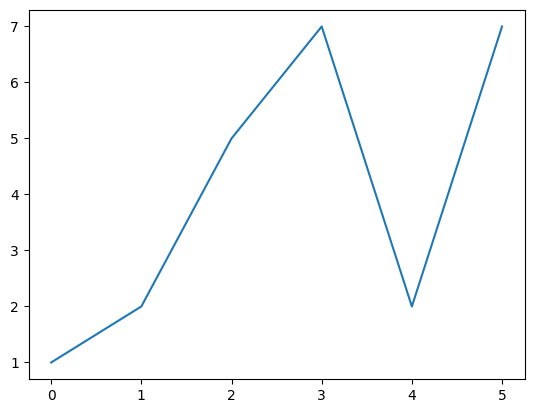

In [91]:
d.plot()

In [92]:
data = {
    'A':[1,2,3],
    'B':[4, 5, 6]
}
df = pd.DataFrame(data)
df

,A,B
0,1,4
1,2,5
2,3,6


<Axes: >

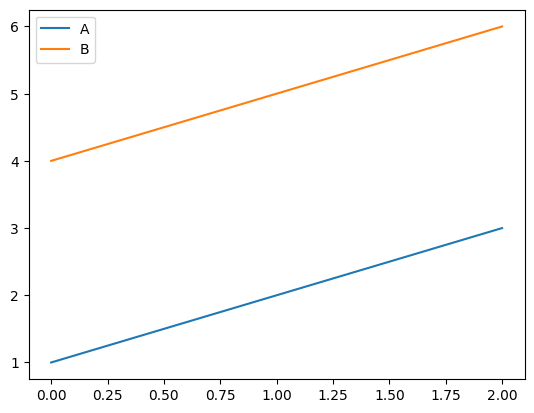

In [94]:
df.plot()

<Axes: >

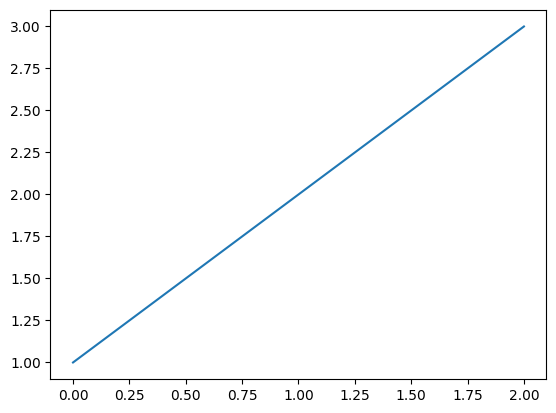

In [ ]:
df['A'].plot.line()

# With time series data/ or to know the trend

<Axes: >

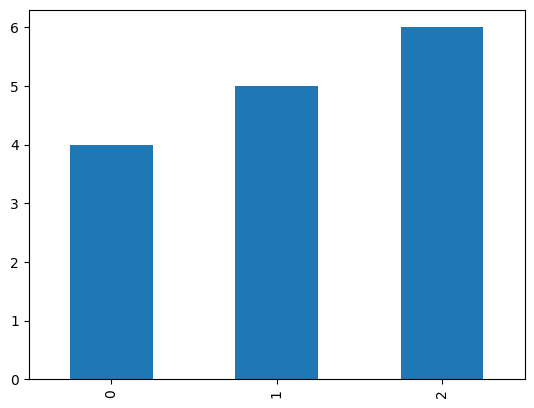

In [ ]:
df['B'].plot(kind='bar')

# Categorical data to know the frequency

<Axes: ylabel='Frequency'>

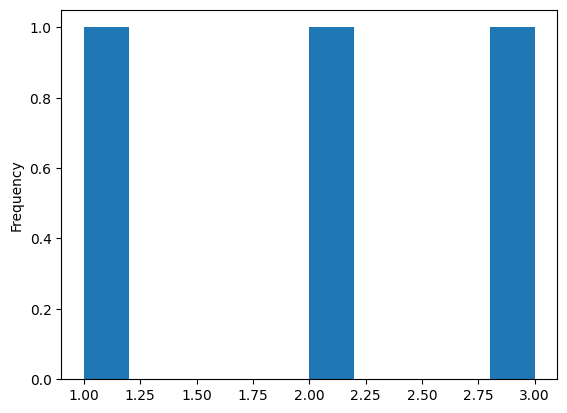

In [ ]:
df['A'].plot(kind='hist')

# For continuous data

<Axes: xlabel='A', ylabel='B'>

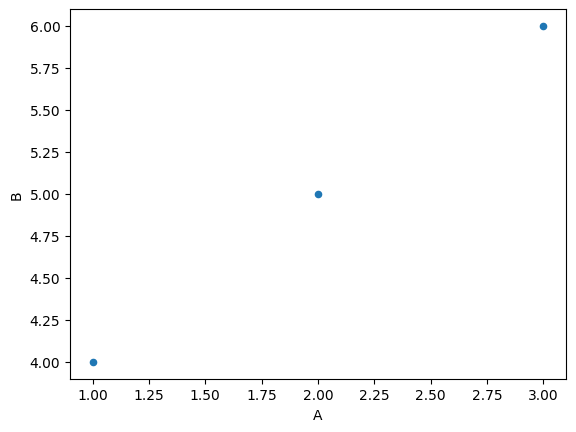

In [ ]:
df.plot(x='A', y='B', kind='scatter')

# Understand the relationship between 2 variables